# Manual gradient descent on linear regression

This notebook is an attempt to teach what I have learnt from the excellent [Fast.ai](https://course.fast.ai/) course, taught by Jeremy Howard.

## Linear regression introduction 

The goal here is to illustrate the two main mathematical concepts that are used everywhere in neural networks.

Our neural networks rely heavily on two mathematical areas :
- Linear algebra, operations on huge matrices that handle our image pixels or text database
- Differential calculus, how far is our neural network from the optimal parameters configuration to classify all our cat and dog images correctly ?

Here we try to find an optimal solution for a simple linear regression problem, which is guessing the optimal linear equation that **fits** a dataset of points :

<img src="resources/target_scatter_plot.png" width="250"/>

The solution we are looking for is a linear function of the form :

$$y = ax + b$$

It will be our learning **model**, this is very basic but we can totally use linear algebra with it, and treat it like a deep learning model.

In fact we will use it to illustrate how matrices help us process a lot of data, and how it is handy for both us and the computer, like a shared conceptual way of visualizing and processing data.

For this example we will chose an arbitrary linear function, you can chose whatever you want but you'll have to modify the subsequent parts in this notebook

Let's take : 

$$y = 3x + 2$$

It looks like this : 

In [3]:
%matplotlib inline
from fastai.basics import *

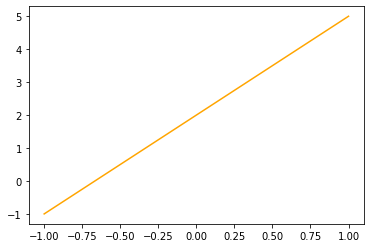

In [4]:
plt.plot([-1, 1], [-1, 5], 'orange')

We will artifically draw a set of point that is spread around this line, because in a real linear regression situation, you are actually guessing what are $a$ and $b$ in $y = ax + b$ from a set of points.

Below is an example of a real world situation : 

<img src="resources/target_scatter_plot.png" alt="drawing" width="350"/>

If we wanted to draw a line that pass through each blue point, we would have to write : 
$$y_{point1} = a_{point1}.x_{point1} + b_{point1}$$ 
$$y_{point2} = a_{point2}.x_{point2} + b_{point2}$$
$$y_{point3} = a_{point3}.x_{point3} + b_{point3}$$
$$...$$
And so on...

So to help us manipulate all this wordiness, of going through every point of our dataset, we use matrices, they provide a great way to summarize this idea, like a multiplication is a way to concisely write many additions. 

Before guessing our optimal solution, we will use matrices to generate the above random scatter plot.

In order to use matrices and linear algebra, we must *arrange* a bit our equation.

We like to replace things by other things in maths, to open up new ways of solving equation, right ?

So let's turn this : $$y = ax + b$$ 

Into this : $$y = ax + b.1$$

Ok we just added an harmless $1$, we will replace it by an arbitrary $x_2$ :

So 

$$x_2 = 1$$
$$x_1 = x$$

And now

$$y = ax_1 + bx_2$$ 

Okay why the $x_1$ and $x_2$ ? Because now we can use a matrix : $X = \begin{bmatrix}x_1 & x_2\end{bmatrix}$

Let's do the same with $a$ and $b$, why not renaming them $a_1$ and $a_2$ ? 

From this : 

$$y = ax_1 + bx_2$$  

We go to this :

$$y = a_1x_1 + a_2x_2$$  

Why ? Because again now we can write $a_1$ and $a_2$ in a matrix form : $A = \begin{bmatrix}a_1 \\ a_2\end{bmatrix}$

Seems like we can perform a basic matrix dot product now : 

$$y = a_1x_1 + a_2x_2$$  
$$y = A\cdot X$$

But wait ! This is not what we want :

$$
\begin{bmatrix}a_1 \\ a_2\end{bmatrix}\cdot
\begin{bmatrix}x_1 & x_2\end{bmatrix} = 
\begin{bmatrix}a_1x_1 & a_1x_2 \\ a_2x_1 & a_2x_2\end{bmatrix}$$

This matrix dot product will give us a 4x4 matrix, and we need a single $y$ 1x1 matrix, which is in fact a single value, so we need to change the order : 

$$y = X\cdot A$$

And recompute our dot product :

$$
\begin{bmatrix}x_1 & x_2\end{bmatrix}\cdot
\begin{bmatrix}a_1 \\ a_2\end{bmatrix}
= 
\begin{bmatrix}x_1a_1 + x_2a_2\end{bmatrix}
=
\begin{bmatrix}xa_1 + 1a_2\end{bmatrix}
=
\begin{bmatrix}xa + 1b\end{bmatrix}
=
\begin{bmatrix}xa + b\end{bmatrix}
=
\begin{bmatrix}ax + b\end{bmatrix}
=
\begin{bmatrix}y\end{bmatrix}
=
y
$$

You see how we replaced $a$s and $x$s to fall back on our $y = ax + b$ ?

Ok great, now we have overly complexified a simple linear equation, but why ? 

Remember our goal is to handle a list of linear equations like this : 

$$y_{point1} = a_1x_{1_{point1}} + a_2x_{2_{point1}}$$ 
$$y_{point2} = a_1x_{1_{point2}} + a_2x_{2_{point2}}$$
$$y_{point3} = a_1x_{1_{point3}} + a_2x_{2_{point3}}$$
$$...$$

Now we can have as much row in our X matrix as we want and it will give us as many $y$s, one for each point, we can now listify this :

$$
\begin{bmatrix}x_1 & x_2\end{bmatrix}\cdot
\begin{bmatrix}a_1 \\ a_2\end{bmatrix}
= 
\begin{bmatrix}y\end{bmatrix}$$

Into this :

$$
\begin{bmatrix}
   x_{1_{point1}} & x_{2_{point1}} 
\\ x_{1_{point2}} & x_{2_{point2}} 
\\ x_{1_{point3}} & x_{2_{point3}} 
\\ \cdots & \cdots
\end{bmatrix}\cdot
\begin{bmatrix}a_1 \\ a_2\end{bmatrix}
=
\begin{bmatrix}y_{point1} \\ y_{point2} \\ y_{point3} \\ \cdots\end{bmatrix}$$

It's like we created a *tool* to handle rendundance concisely, and the computer loves it, same operation to perform again and again.

## Generation of our fake real world data points

Let's take 100 points to generate our random dataset :

In [5]:
numberOfPoints = 100

We generate the X matrix filled with $1.0$ (PyTorch makes the difference between float and integer)

In [6]:
X = torch.ones(numberOfPoints, 2)
X[:5]

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

Some Python reminder : 

We select the first column with `[:,0]` 
 
`[:]` gets all the elements of the array

`,0` gets the first column of each element

We then apply a mutation on the first column to randomize every $x_1$

By using the function `array.uniform_()`

In [7]:
X[:,0].uniform_(-1.,1) # Mutate the first column with random uniform values between -1 and 1
X[:5] # Print the first 5 rows of our matrix X

tensor([[ 0.6485,  1.0000],
        [-0.7819,  1.0000],
        [-0.0383,  1.0000],
        [-0.0013,  1.0000],
        [-0.7098,  1.0000]])

Let's now define our A matrix, with $A = \begin{bmatrix}3 \\ 2\end{bmatrix}$ which corresponds to our $y = 3x + 2$

In [8]:
A = tensor(3.0, 2);
A

tensor([3., 2.])

We compute $Y = X.A$

In [9]:
Y = X@A
Y[:10]

tensor([ 3.9456, -0.3457,  1.8850,  1.9960, -0.1295,  1.0493, -0.5885, -0.2000,
         1.8979,  1.4720])

Now if we draw our representation we see that our random points correctly follow our equation $y = 3x + 2$

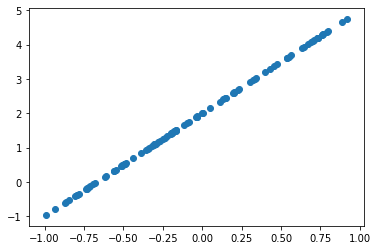

In [10]:
plt.scatter(X[:,0], Y);

But we want to spread them vertically to have a more realistic dataset, so let's apply a bit of artificial randomness on our Y matrix : 

In [11]:
spreadSize = 1
R = (torch.rand(100) * -spreadSize) + (torch.rand(100) * spreadSize)
R[:10]

tensor([-0.3021,  0.0230,  0.0130,  0.1189,  0.0713, -0.4725,  0.1075,  0.9260,
         0.1473, -0.4436])

In [12]:
Y_2 = Y+R
Y_2[:10]

tensor([ 3.6436, -0.3227,  1.8980,  2.1150, -0.0582,  0.5768, -0.4810,  0.7260,
         2.0452,  1.0284])

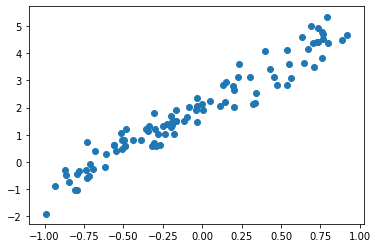

In [13]:
plt.scatter(X[:,0], Y_2);

Great ! We have randomized a bit our $y$s around their original $3x+2$ slope

We can say that $a_1$ and $a_2$ are our **parameters** or **weights** or **coefficients**, and in a neural network like resnet34, we don't have 2 $a$s but millions.

Nonetheless the principle remains the same, we do gradient descent on our weights to find the most average optimal solution that best fits all our points.

We do gradient descent by guessing our weights $a_1$ and $a_2$

To do this we will try to minimize the **error** between our points and the points of the slope we are trying to guess, we use an **error function** or **loss function**

The most common error function for a linear regression problem is the **mean squared error**

The goal of our error function is to tell how far away each actual point is from the prediction, then we average all those distances between prediction and actual position, and this gives us our **error** or **loss**

In [14]:
def computeMeanSquaredError(y_hat, y):
    squaredError = (y_hat - y) ** 2
    meanSquaredError = squaredError.mean()
    return meanSquaredError

We use by convention $\hat{y}$ (y hat) to talk about the predicted value of $y$

For the maths it's : 
$$e = \frac{1}{n}\sum_{i=1}^{n}(\hat{y_i}-y_i)^2$$

With $e$ our loss or error, but don't freak out if you can't read this, it's just a way of describing the MeanSquaredError python code in mathematicians language. 

In real world case, we don't know matrix $A$, so we will try a first blind guess with $A_1 = \begin{bmatrix}1 \\ 1\end{bmatrix}$, and compute our error with our **MSE** error function

In [15]:
A_1 = tensor(1., 1)
A_1

tensor([1., 1.])

In [16]:
Y_hat_1 = X@A_1
Y_hat_1[:10]

tensor([1.6485, 0.2181, 0.9617, 0.9987, 0.2902, 0.6831, 0.1372, 0.2667, 0.9660,
        0.8240])

In [17]:
loss = computeMeanSquaredError(Y_hat_1, Y_2)
loss

tensor(2.1674)

Let's draw our predicted function to see how it **fits** with our points :

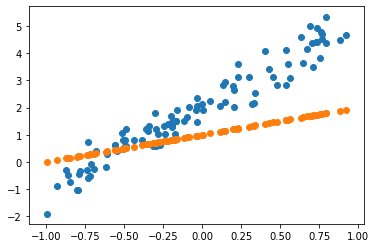

In [18]:
plt.scatter(X[:,0], Y_2)
plt.scatter(X[:,0], Y_hat_1)

Interesting isn't it ? We can see that our prediction matrix $\hat{Y_1}$, drawn in orange, is not aligned with our fake real blue points, and we understand that the average distance between each orange  point and its blue equivalent is our loss

So far, we have seen almost all the ingredients to do deep learning : 
- The **model**, here it's not resnet34 but linear regression or guessing $y = ax + b$
- The **error function** or **evaluation criteria**, here **MSE**
- The **error** or **loss** that we will try our best to minimize

We must now find a mechanism that will guess our optimal weights, this is called **optimization**.

And one of the most common algorithm to do this is called **gradiend descent**.

Basicaly, it's like finding the lowest point of a mountainous terrain, going forward one step at a time.

How can you now you're at the lowest point of the whole area ? Especially when there's multiple valleys everywhere ? Meet gradient descent.

## Gradient descent 

We'll use PyTorch to implement a simple gradient descent 

Let's turn our $A_1$ **weight** matrix into a PyTorch weight matrix $A_2$ :

In [19]:
A_2 = nn.Parameter(tensor([1.,1]));
A_2

Parameter containing:
tensor([1., 1.], requires_grad=True)

This new $A_2$ weight matrix tensor object will be augmented with PyTorch functions to compute gradient and other handy things.

Note that PyTorch use the term **parameter** instead of weight

In [20]:
def computeLinearRegressionGradientDescent(
    parameterTensor: Tensor, 
    X: Tensor, 
    errorFunction,
    Y: Tensor,
    learningRate: float
):
    Y_hat = X @ parameterTensor
    computedLoss = computeMeanSquaredError(Y_hat, Y)
    computedLoss.backward()
    with torch.no_grad():
        parameterTensor.sub_(
            learningRate * parameterTensor.grad
        )
        parameterTensor.grad.zero_()
    return computedLoss

In [21]:
chosedLearningRate = 0.1
chosedIterations = 100

In [22]:
A_2 = nn.Parameter(tensor([1.,1])); # Reinitialize parameters

for i in range(chosedIterations):
    returnedLoss = computeLinearRegressionGradientDescent(
        parameterTensor=A_2,
        X=X,
        errorFunction=computeMeanSquaredError,
        Y=Y_2,
        learningRate=chosedLearningRate
    )
    if i % 10 == 0: print(returnedLoss)

tensor(2.1674, grad_fn=<MeanBackward0>)
tensor(0.5945, grad_fn=<MeanBackward0>)
tensor(0.3082, grad_fn=<MeanBackward0>)
tensor(0.2171, grad_fn=<MeanBackward0>)
tensor(0.1874, grad_fn=<MeanBackward0>)
tensor(0.1776, grad_fn=<MeanBackward0>)
tensor(0.1745, grad_fn=<MeanBackward0>)
tensor(0.1734, grad_fn=<MeanBackward0>)
tensor(0.1731, grad_fn=<MeanBackward0>)
tensor(0.1730, grad_fn=<MeanBackward0>)


You can play with the value of learning rate and number of iterations to feel how it behaves

Then draw it :

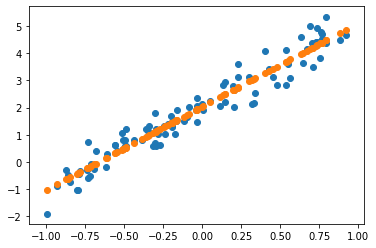

In [23]:
Y_hat_2 = X @ A_2.data
plt.scatter(X[:,0],Y_2)
plt.scatter(X[:,0],Y_hat_2);

It will help to animate it

In [125]:
baseParameterTensor = tensor(-10., 3)

In [126]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

templateFigure = plt.figure()
plt.scatter(X[:,0], Y_2)
line, = plt.plot(X[:,0], X@baseParameterTensor, c='orange')
plt.close()

In [140]:
chosedLearningRate = 1.0
chosedIterations = 50

A_3 = nn.Parameter(baseParameterTensor.clone()); # Reinitialize parameters

def animateForThisIteration(i):
    computeLinearRegressionGradientDescent(
        parameterTensor=A_3,
        X=X,
        errorFunction=computeMeanSquaredError,
        Y=Y_2,
        learningRate=chosedLearningRate
    )
    Y_hat_2 = X@A_3.data
    line.set_ydata(Y_hat_2)
    return line

gradientDescentAnimation = animation.FuncAnimation(
    templateFigure,
    animateForThisIteration,
    frames=chosedIterations,
    interval=30
)

In [141]:
gradientDescentAnimation

In [142]:
A_3 = nn.Parameter(baseParameterTensor.clone()); # Reinitialize parameters for animation.save()
gradientDescentAnimation.save('resources/learning_rate_1.gif', fps=30)

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
